In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys

(434732, 3)


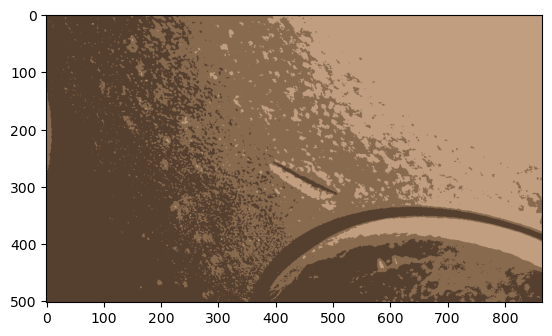

In [19]:
img = cv2.imread('/home/pratyush-g/Pictures/Nick.png')
#img2 = img.reshape((-1,1))    #For Gray Scale Images
img2 = img.reshape((-1,3))
print(img2.shape)
img2 = np.float32(img2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv2.kmeans(img2,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# th = 0
# max_val = 255
# ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

#o2 = o2.reshape((-1,1))
#o2 = np.float32(o2)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
#res2 = res.reshape((img.shape[0], img.shape[1]))   #For Gray Scale Images
#plt.imshow(o2, cmap='gray')
plt.imshow(res2)

In [12]:
h,w = o2.shape
print(o2.shape)

def cc(img):
  
  r = np.zeros((h,w))
  k = 1
  for i in range(1,h):

    for j in range(1,w):

      if img[i,j] == 255:

        if ((img[i,j-1] == 0) and (img[i-1,j] == 0)):
          r[i,j] = k
          k += 1

        elif ((img[i,j-1] == 255) and (img[i-1,j] == 0)):
          r[i,j] = r[i,j-1]
        
        elif ((img[i,j-1] == 0) and (img[i-1,j] == 255)):
          r[i,j] = r[i-1,j]

        elif ((img[i,j-1] == 255) and (img[i-1,j] == 255)):
          r[i,j] = r[i-1,j]
          if r[i,j-1]!=r[i-1,j]:
            r[i,j-1] = r[i-1,j]

  return r

(502, 866)


[0.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00 7.000e+00 1.200e+01
 1.500e+01 1.600e+01 1.700e+01 1.800e+01 2.000e+01 2.100e+01 2.200e+01
 2.400e+01 2.500e+01 2.600e+01 2.700e+01 2.800e+01 2.900e+01 3.000e+01
 3.200e+01 3.300e+01 3.600e+01 3.700e+01 3.800e+01 3.900e+01 4.100e+01
 4.200e+01 4.400e+01 4.800e+01 4.900e+01 5.000e+01 5.100e+01 5.200e+01
 5.300e+01 5.400e+01 5.500e+01 5.600e+01 6.200e+01 6.300e+01 6.400e+01
 6.600e+01 6.700e+01 6.800e+01 6.900e+01 7.000e+01 7.300e+01 7.400e+01
 7.600e+01 7.700e+01 7.900e+01 8.100e+01 8.300e+01 8.700e+01 8.800e+01
 8.900e+01 9.000e+01 9.100e+01 9.400e+01 9.500e+01 9.600e+01 9.800e+01
 1.020e+02 1.050e+02 1.060e+02 1.080e+02 1.090e+02 1.100e+02 1.110e+02
 1.140e+02 1.150e+02 1.170e+02 1.180e+02 1.200e+02 1.210e+02 1.230e+02
 1.240e+02 1.250e+02 1.260e+02 1.280e+02 1.300e+02 1.310e+02 1.330e+02
 1.340e+02 1.350e+02 1.380e+02 1.400e+02 1.410e+02 1.460e+02 1.470e+02
 1.490e+02 1.500e+02 1.510e+02 1.540e+02 1.550e+02 1.560e+02 1.570e+02
 1.580

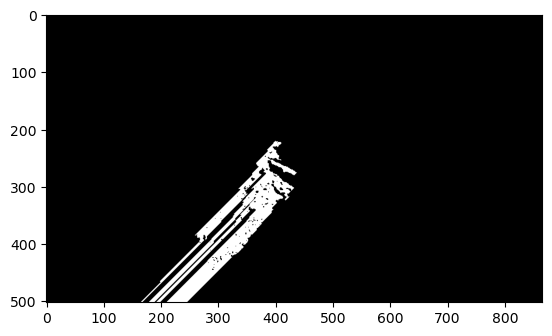

In [13]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

a, b = o2.shape
r = cc(o2)
#print(r)
elemnets,freq=np.unique(r,return_counts=True)
print(elemnets, freq)
# #x = freq.sort()
# #x = x[-3:-2]
# #print(x)
# # elements = elemnets[x[1]]
# # pri1nt(elements)
# #x = numpy.amax(r, axis=None)
# freq = sorted(freq)
# print(freq)
# #freq = freq[-3:0]
# print(elemnets[freq := freq[-2]])

from collections import Counter

ctr = Counter(r.ravel())
second_most_common_value, its_frequency = ctr.most_common(2)[1]

print(second_most_common_value)

for i in range(a):
    for j in range(b):
        if r[i,j] == second_most_common_value:
            r[i][j] = 255
        else:
            r[i][j] = 0

plt.imshow(r)
plt.gray()

Text(0.5, 1.0, 'Binary')

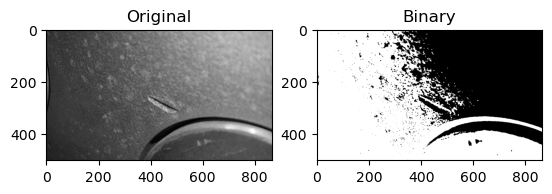

In [11]:
path = "/home/pratyush-g/Pictures/"

imgpath1 =  path + "Nick.png"
    
#    imgpath1 =  path + "4.2.07.tiff"

img = cv2.imread(imgpath1, 0)
    
#    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
th = 0
max_val = 255
    
ret, o1 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret, o3 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO + cv2.THRESH_OTSU)
ret, o4 = cv2.threshold(img, th, max_val, cv2.THRESH_TOZERO_INV + cv2.THRESH_OTSU)
ret, o5 = cv2.threshold(img, th, max_val, cv2.THRESH_TRUNC + cv2.THRESH_OTSU)

output = [img, o1, o2, o3, o4, o5]

titles = ['Original', 'Binary', 'Binary Inv',
        'Zero', 'Zero Inv', 'Trunc']

plt.subplot(1,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(o2, cmap = 'gray')
plt.title('Binary')
# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(output[i], cmap='gray')
#     plt.title(titles[i])
#     #plt.xticks([])
#     #plt.yticks([])

(434732, 1)


Text(0.5, 1.0, 'Original')

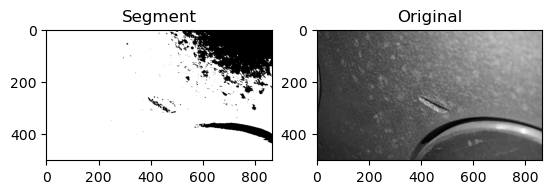

In [15]:
img = cv2.imread('/home/pratyush-g/Pictures/Nick.png', 0)
img2 = img.reshape((-1,1))
print(img2.shape)
img2 = np.float32(img2)

# th = 0
# max_val = 255
# ret, o2 = cv2.threshold(img, th, max_val, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU )

# o2 = o2.reshape((-1,1))
# o2 = np.float32(o2)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 6
ret,label,center=cv2.kmeans(img2,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape[0], img.shape[1]))
#print(res2)
for i in range(res2.shape[0]):
    for j in range(res2.shape[1]):
        if res2[i][j] >= 150:
            res2[i][j] = 0
        else:
            res2[i][j] = 255

np.set_printoptions(threshold=sys.maxsize)

#print(res2)
plt.subplot(1,2,1)
plt.imshow(res2, cmap = 'gray')
plt.title('Segment')
plt.subplot(1,2,2)
plt.imshow(img, cmap = 'gray')                  
plt.title('Original')

(434732, 1)
(502, 866)


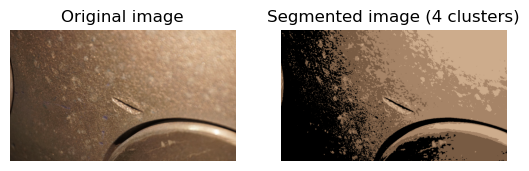

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, segmentation, color, graph
from sklearn.mixture import GaussianMixture

# Load an image
img = cv2.imread('/home/pratyush-g/Pictures/Nick.png')

# Convert the image to grayscale
img_gray = color.rgb2gray(img)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(img_gray.reshape(-1, 1))

# Cluster the data using GMM
n_components = 4
covariance_type = 'full'
gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
gmm.fit(X_norm)
print(X_norm.shape)

# Segment the image based on the clusters
l = gmm.predict(X_norm).reshape(img_gray.shape)
print(l.shape)

# Create a graph and merge small regions
# g = graph.RAG(l)

# labels = graph.cut_normalized(l, g)

# Plot the original image and the segmented image
#plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Original image')
plt.subplot(122)
plt.imshow(color.label2rgb(l, img, kind='avg'))
plt.axis('off')
plt.title('Segmented image ({} clusters)'.format(n_components))
plt.show()